The purpose of this notebook is to check for outliers in the CO2 per capita feature. The synthetic control method relies on "similar" predictors in the pre-treatment range.

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np

In [30]:
df = pd.read_csv(os.path.join("..","..","..","SharedData","total_state_data.csv"))

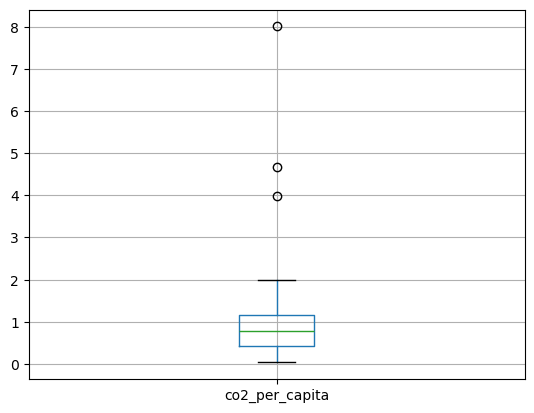

In [31]:
# Get the right year range
df = df[(df.year>=2000)&(df.year<2010)]
df["co2_per_capita"] = df.monthly_emissions / df.monthly_population
df = df[df.state != "DC"]
df.groupby("state").mean(numeric_only=True)[["co2_per_capita"]].boxplot()
plt.show()

In [32]:
# Okay we have three outliers, where outliers are determined as points outside 1.5 times the interquartile range IQR.
# Let's figure out what they are. Perhaps later I can label the plot.
means_df = df.groupby("state").mean(numeric_only=True)[["co2_per_capita"]]
means_df.sort_values("co2_per_capita", ascending=False).head(3)

,co2_per_capita
state,
WY,8.009140
ND,4.668199
WV,3.980056


This might then suggest we should eliminate Wyoming, North Dakota, and West Virginia from our selection of control states.

In [33]:
# But what about Texas? Isn't that a big emitter?
means_df[means_df.index == "TX"]

,co2_per_capita
state,
TX,0.915441


In [34]:
# Texas may be a big emitter, but per capita it's fairly middle of the road.
means_df.sort_values("co2_per_capita", ascending=False)

,co2_per_capita
state,
WY,8.009140
ND,4.668199
WV,3.980056
KY,1.987658
MT,1.777897
IN,1.738799
AL,1.601828
NM,1.473714
UT,1.329475


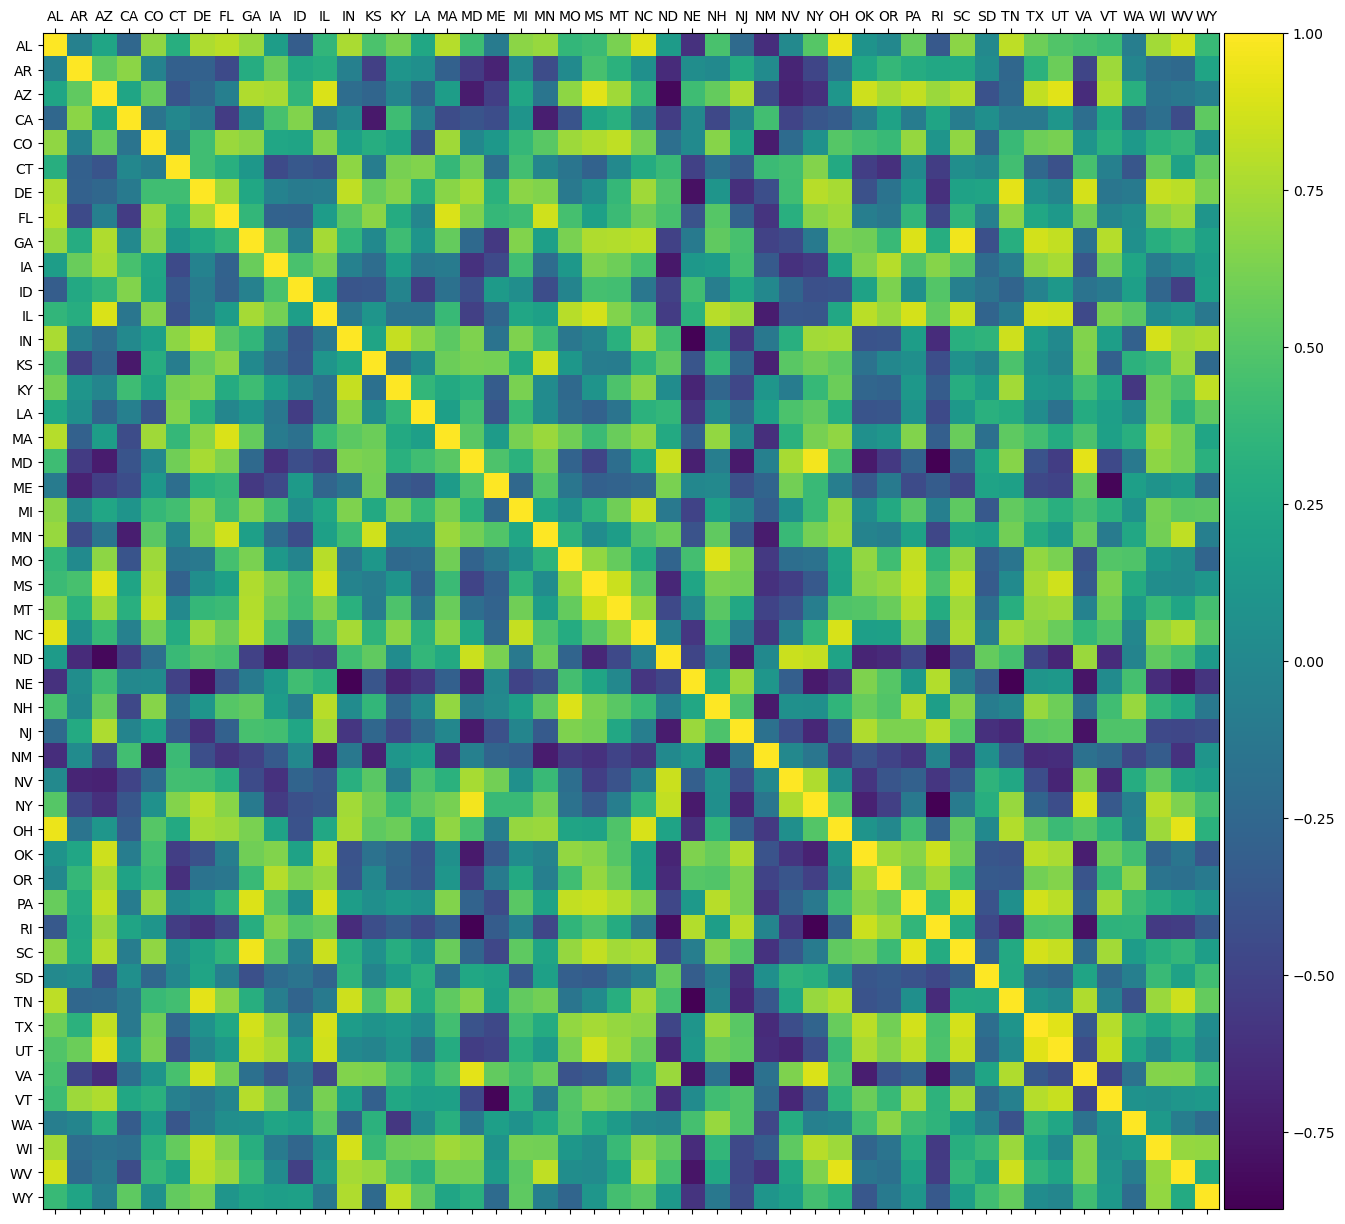

In [35]:
# Also examine correlations between CO2 emittance. Anything out of the ordinary?
states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

yearly_emissions = df.groupby(["state", "year"])[["monthly_emissions"]].sum()
corr_matrix = yearly_emissions.unstack(level=0).corr()
labels = list(df.state.unique())
xaxis = np.arange(len(labels))
#print(corr_matrix)
#print(labels)

fig, ax = plt.subplots(figsize=(16,16))
corr_plot = ax.matshow(corr_matrix)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(corr_plot, cax=cax)
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()